# ZADANIE 1

In [1584]:
from __future__ import division
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt
from ipykernel.pylab.backend_inline import flush_figures
%matplotlib inline

UWAGA: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.

In [1585]:
def fftFunction(A, t, f):
    return A*np.sin(2*pi*t*f) 

def drawFFT(A = 1.0, LP = 1, w = 40, f = 2.0, FUNC=fftFunction):
    
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)
    T = 1.0/f        

    # Okres probkowania [s] (co ile sekund pobieramy próbkę)
    TW = 1.0/w        

    # generujemy momenty, w których pobieramy próbki
    t = np.arange(0, LP*T, TW)

    n = len(t)

    # funkcja sprobkowana
    signal = FUNC(A, t, f)                 

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(A, base_t, f)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')
    ax.set_xlabel("t [s]")
    ax.set_ylabel("y(t) [j]")

    signal1 = fft.fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)
    signal1 = 2 / n * signal1       
    # modul sygnalu

    freqs = np.linspace(0, w, int(n))

    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')
    ax.set_xlabel("f [Hz]")
    ax.set_ylabel("A [j]")

    show()


b) Zmień częstotliwość próbkowania na 50Hz.

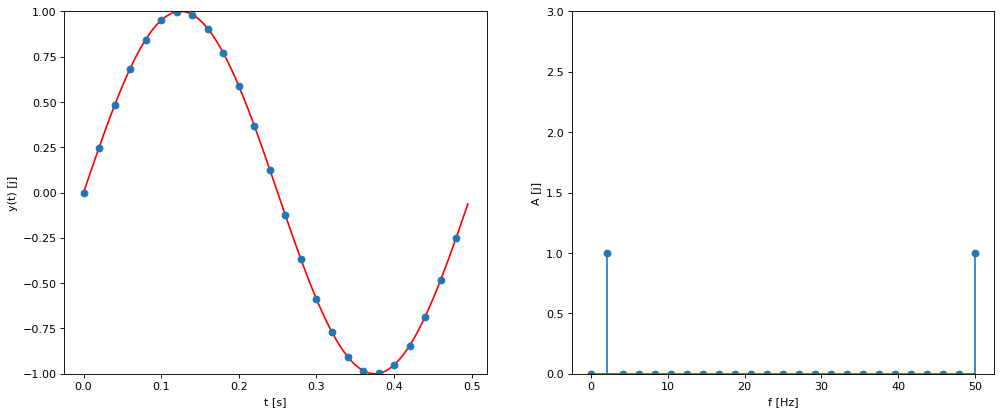

In [1586]:
drawFFT(w=50)

c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

In [1587]:
# popraw oś OX - zrobione

d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

In [1588]:
# Podpisz osie wykresów - zrobione

f) Porównaj spektrum funkcji $sin(2*pi*f*t)$, $2*sin(2*pi*f*t)$ i $3*sin(2*pi*f*t)$. Jak zmienia się wartość na osi OY na wykresie spektrum?

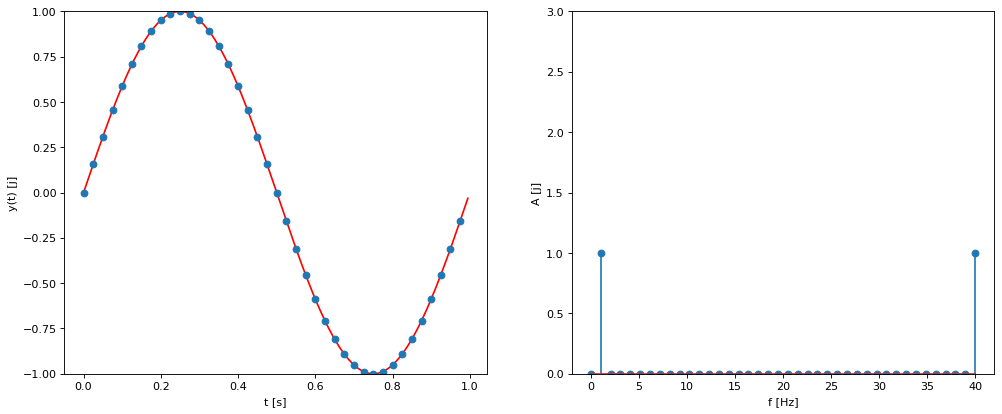

In [1589]:
drawFFT(f=1, A=1, LP=1)

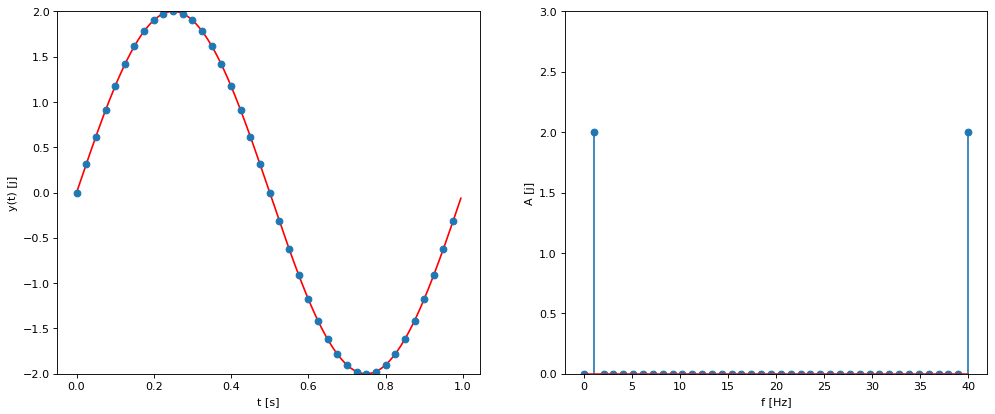

In [1590]:
drawFFT(f=1, A=2, LP=1)

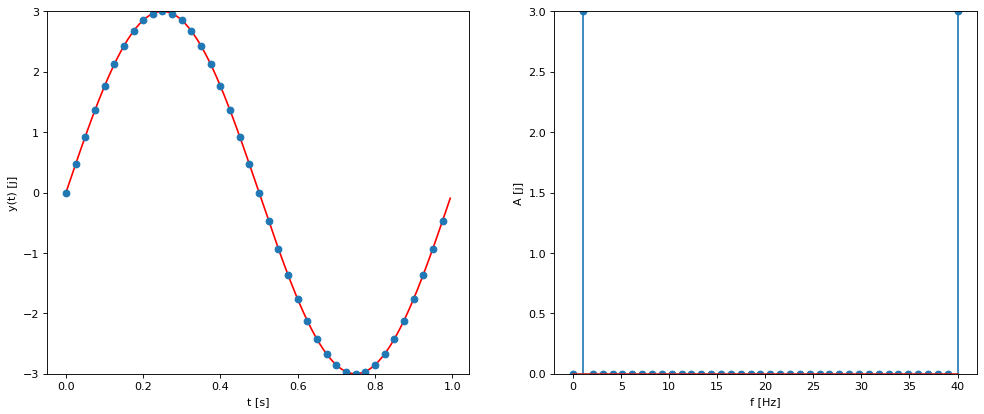

In [1591]:
drawFFT(f=1, A=3, LP=1)

Odpowiedź: wartość na osi OY jest wprost proporcjonalna do amplitudy sygnału.

g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, T=1s? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(2*pi*f*t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

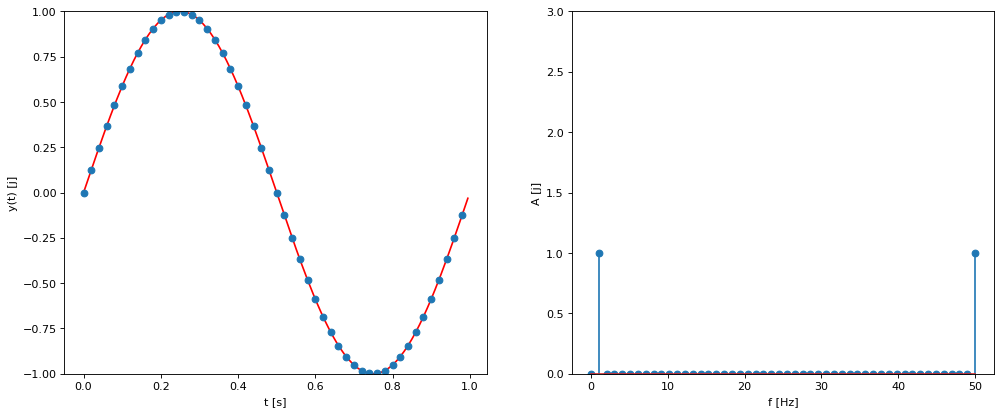

In [1592]:
drawFFT(f=1, w=50, LP=1)

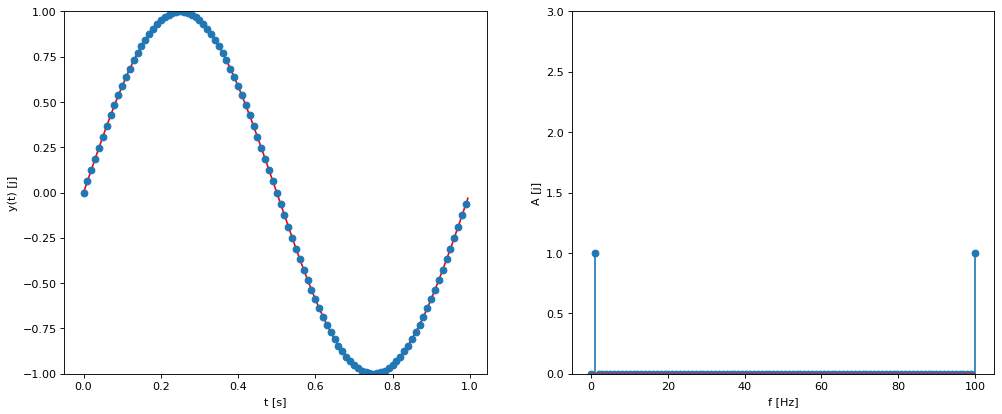

In [1593]:
drawFFT(f=1, w=100, LP=1)

Przy częstotliwości 50 Hz jest 50 punktów na wykresach.

h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji.

In [1594]:
# popraw oś OY - zrobione

# Zadanie 2

a) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. Dlaczego uzyskano taki wynik?

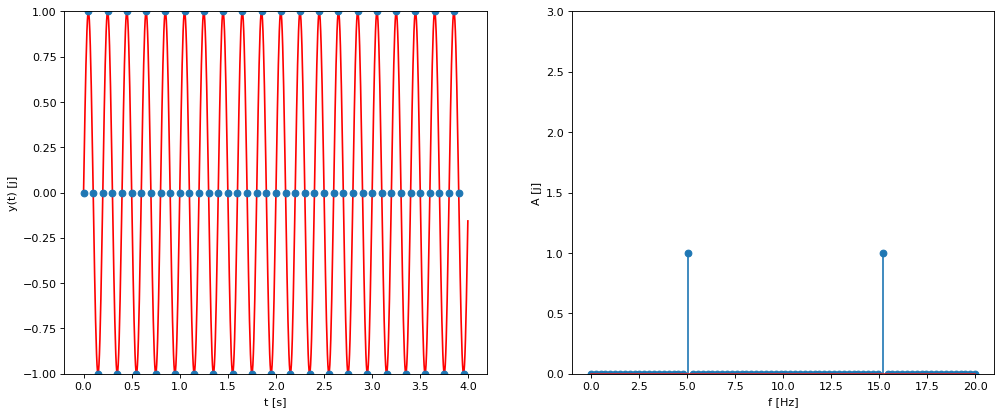

In [1595]:
drawFFT(f=5, w=20, LP=20)

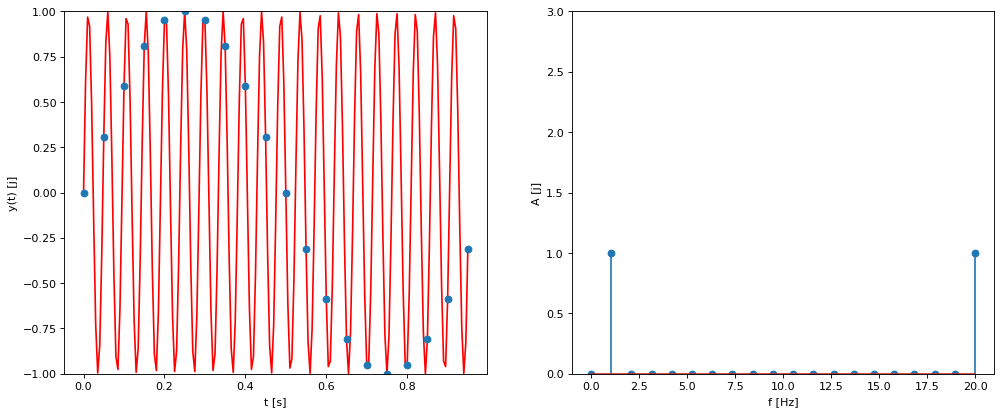

In [1596]:
drawFFT(f=21, w=20, LP=20)

Zwróć uwagę, że spektrum jest symetryczne (poza pierwszym elementem).

Otrzymano taki wynik, ponieważ częstotliwość sygnału jest większa niż połowa częstotliwości próbkowania.

b) Przy w=100Hz, przeanalizuj widma sygnałów:

i) $sin(2*pi*t*f)$, $f=10Hz$

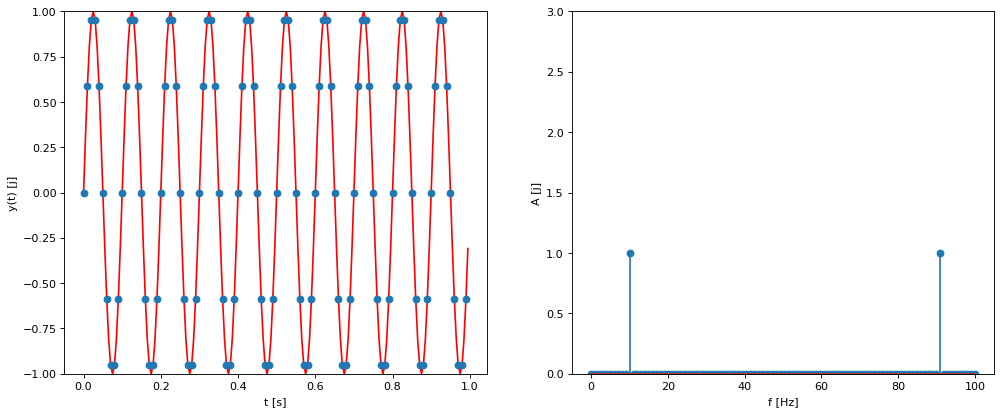

In [1597]:
# f=10, w=100, A=1, LP=10
drawFFT(f=10, w=100, A=1, LP=10)

ii) $sin(2*pi*t*f)$, $f=20Hz$

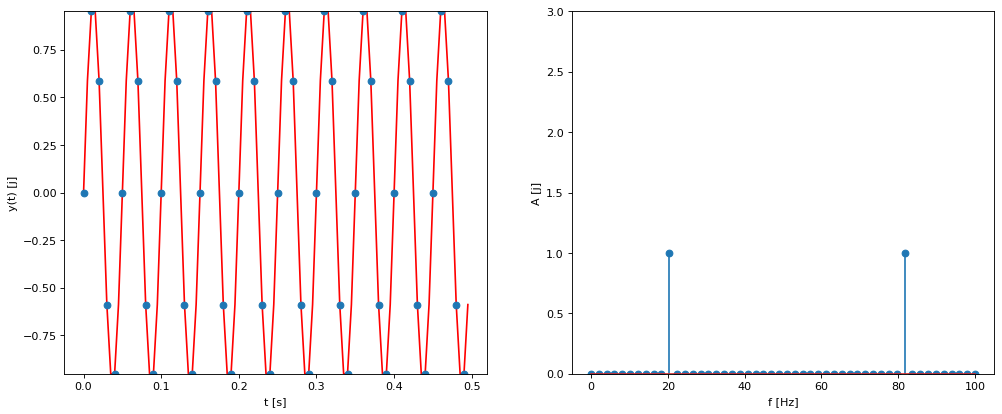

In [1598]:
# f=20, w=100, A=1, LP=10
drawFFT(f=20, w=100, A=1, LP=10)

iii) $sin(2*pi*t*f)$, $f=30Hz$ (tutaj słupki nie będą wyglądać idealnie; dlaczego?)

Ponieważ wykres nie jest idealną sinusoidą.

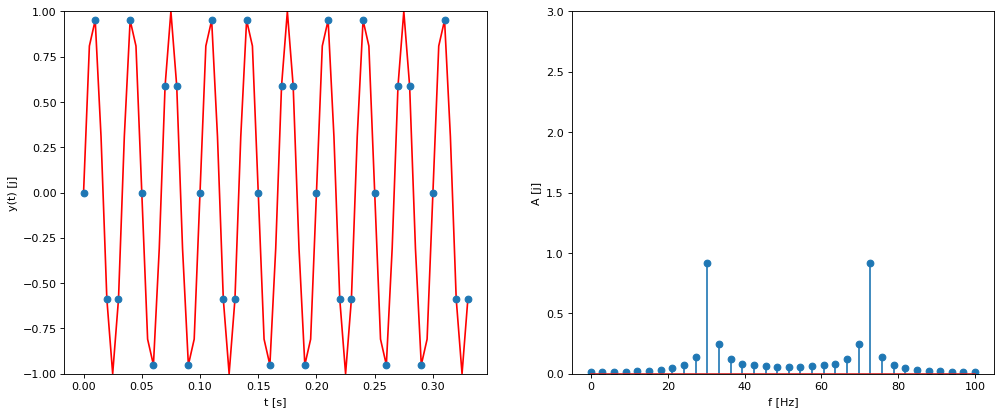

In [1599]:
# f=30, w=100, A=1, LP=10
drawFFT(f=30, w=100, A=1, LP=10)

iv) $sin(2*pi*t*f)$, $f=40Hz$

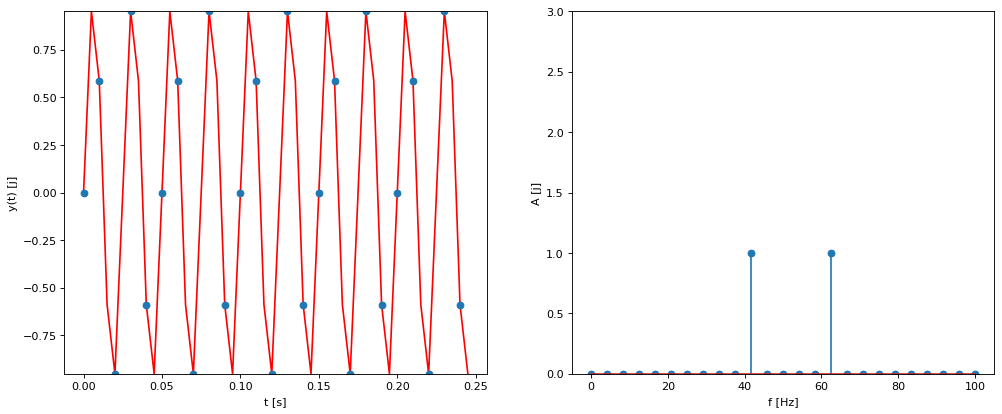

In [1600]:
# f=40, w=100, A=1, LP=10
drawFFT(f=40, w=100, A=1, LP=10)

c) Przy F=50Hz, w=100Hz, wygeneruj spektrum dla $sin(2*pi*f*t)$. Zwróć uwagę na skalę wykresów.

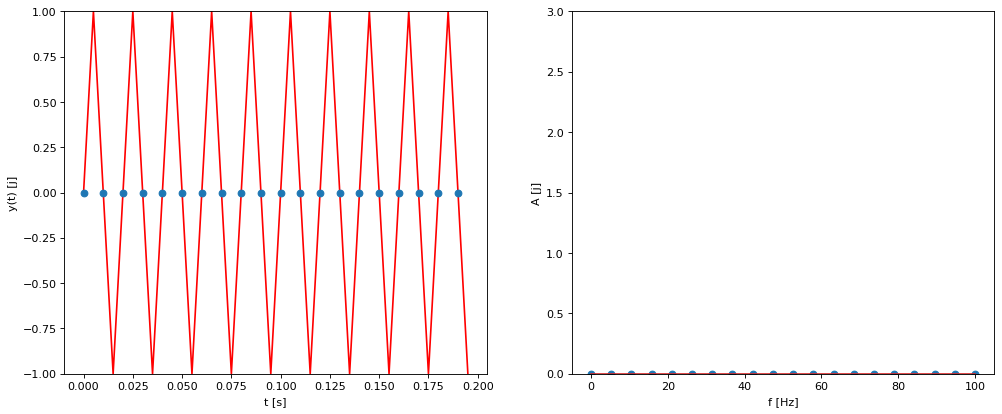

In [1601]:
# f=50, w=100, A=1, LP=10
drawFFT(f=50, w=100, A=1, LP=10)

c) Jak się nazywa twierdzenie, którego konsekwencją jest takie zachowanie się spektrum?

Twierdzenie kotielnikowa-shannona

# Zadanie 3

Poniższe przypadki skłądają się z złożonych sygnałów. Trzeba teraz będzie zmodyfikować trochę FUNC

a) $sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

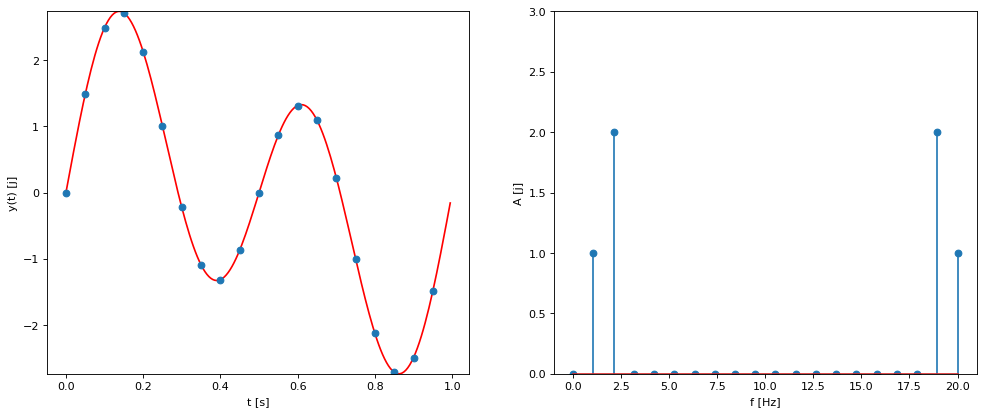

In [1602]:
def fftFunction2(A, f, t):
    return np.sin(2*pi*t*f) + 2 * np.sin(4*pi*t*f)

drawFFT(f=1, w=20, FUNC=fftFunction2)

c) Wygenerujemy trochę szumu. Wychodząc z funkcji sin(2*2*pi*t*f), dodamy do niej 100 losowych sinusów. Wygenerujemy dla nich losowo amplitudy (z [0.1, 0.3], częstotliwosci: [2.0, 4.0] oraz modyfikacje fazy[0 + mt.pi]. Jeżli utworzyłeś/aś funkcje lambda wcześniej, śmiało możesz ją podmienić na 'zwyczajną funkcję', która będzie realizować sumowanie losowych sinusów. Inne parametry: w=20Hz, T=1s. Czy dla powyższych paramerów losowania, jesteś w stanie odnaleźć bazowy przebieg (sin(2*2*pi*t))? (Jeżeli wykorzystujesz podany na początku kod, to nie przejmuj się, że pełen sygnał i sprókowany sobie nie odpowiadają. Każdy jest inny - bo losowy).

d) $0.5 + 2*sin(2*pi*t*f)$, T=1s, w=20Hz. Czy amplituda zerowego prążka jest prawidłowa? Dlaczego? (Podpowiedź: zwróć jeszcze raz uwagę na “symetrię” spektrum).

In [1603]:
# Wyrysuj sygnał


e) $sin(2*pi*t*f)$ oraz $sin(2*pi*t*f + pi/4)$ dla T=1s, w=20Hz. Czy informacja o fazie zniknęła? Poszukaj śladów tej informacji w tablicy, będącej wynikiem operacji fft(signal). (funkcja angle(sygnal, deg=True)

In [1604]:
# faza = 0


In [1605]:
# faza = pi/4


# Zadanie 4

Oblicz wynik ifft(fft(x)), gdzie x=random.random(10). Czy jakaś informacja została stracona?

In [1606]:
# wygeneruj wektor x


In [1607]:
# oblicz fft z x


In [1608]:
# oblicz ifft

In [1609]:
#porownaj x z ifft(fft(x)), wystarczy print